# Codelab 2 - Data Processing dan Visualisasi Dataset Retail Sales

Pada codelab ini, kita akan melakukan:
1. Sorting data berdasarkan kolom numerik
2. Filtering dengan dua kondisi
3. Menghapus kolom yang tidak diperlukan
4. Membuat visualisasi data dengan subplot


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('retail_sales_dataset.csv')
print(f"Shape: {df.shape}")
df.head()


Shape: (200, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 1. Sorting Data Berdasarkan Kolom Numerik

**Catatan:** 
- NIM Ganjil: Sorting **Ascending** (naik)
- NIM Genap: Sorting **Descending** (turun)

Kita akan sorting berdasarkan **Total Amount**


In [2]:
# NIM: 448 (Genap) -> Sorting Descending
df_sorted = df.sort_values(by='Total Amount', ascending=False)
print("Sorting: Descending (NIM Genap)")
df_sorted.head(10)


Sorting: Descending (NIM Genap)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
64,65,2023-12-05,CUST065,Male,51,Electronics,4,500,2000
71,72,2023-05-23,CUST072,Female,20,Electronics,4,500,2000
14,15,2023-01-16,CUST015,Female,42,Electronics,4,500,2000
117,118,2023-05-16,CUST118,Female,30,Electronics,4,500,2000
108,109,2023-10-18,CUST109,Female,34,Electronics,4,500,2000
92,93,2023-07-14,CUST093,Female,35,Beauty,4,500,2000
88,89,2023-10-01,CUST089,Female,55,Electronics,4,500,2000
73,74,2023-11-22,CUST074,Female,18,Beauty,4,500,2000
138,139,2023-12-15,CUST139,Male,36,Beauty,4,500,2000
151,152,2023-02-28,CUST152,Male,43,Electronics,4,500,2000


## 2. Filtering dengan Dua Kondisi

Filter data dengan kondisi:
- **Quantity > 5**
- **Total Amount > 300**


In [3]:
# Filter: Quantity > 5 dan Total Amount > 300
df_filtered = df[(df['Quantity'] > 5) & (df['Total Amount'] > 300)]
print(f"Sebelum: {len(df)} | Sesudah: {len(df_filtered)}")
df_filtered


Sebelum: 200 | Sesudah: 0


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


In [4]:
# Hapus kolom Transaction ID
df_cleaned = df.drop(columns=['Transaction ID'])
print(f"Kolom: {list(df_cleaned.columns)}")
df_cleaned.head()


Kolom: ['Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 4. Visualisasi Data dengan Subplot

Kita akan membuat 4 visualisasi kreatif dalam satu figure:
1. **Bar Chart**: Total Sales per Product Category
2. **Pie Chart**: Distribusi Gender
3. **Line Chart**: Trend Sales per Bulan
4. **Scatter Plot**: Relationship antara Quantity dan Total Amount


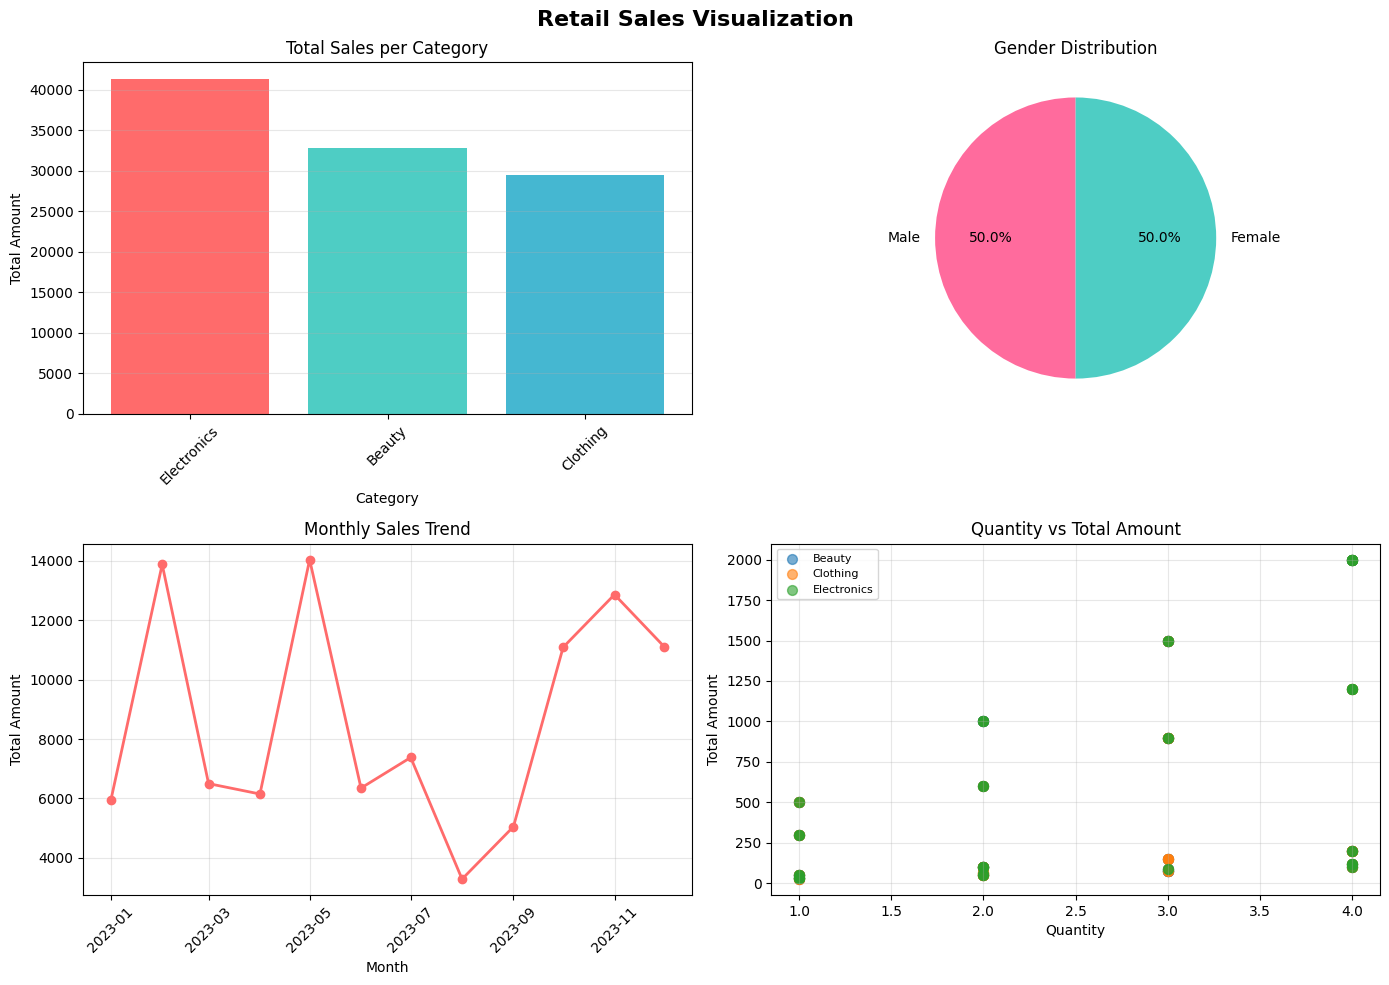

In [5]:
# Persiapan data
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Data untuk visualisasi
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
gender_dist = df['Gender'].value_counts()
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])

# Buat 4 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Retail Sales Visualization', fontsize=16, fontweight='bold')

# 1. Bar Chart
axes[0, 0].bar(category_sales.index, category_sales.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 0].set_title('Total Sales per Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Total Amount')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Pie Chart
axes[0, 1].pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%', 
               colors=['#FF6B9D', '#4ECDC4'], startangle=90)
axes[0, 1].set_title('Gender Distribution')

# 3. Line Chart
axes[1, 0].plot(monthly_sales['Month'], monthly_sales['Total Amount'], 
                marker='o', color='#FF6B6B', linewidth=2)
axes[1, 0].set_title('Monthly Sales Trend')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Total Amount')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(alpha=0.3)

# 4. Scatter Plot
for category in df['Product Category'].unique():
    data = df[df['Product Category'] == category]
    axes[1, 1].scatter(data['Quantity'], data['Total Amount'], label=category, alpha=0.6, s=50)
axes[1, 1].set_title('Quantity vs Total Amount')
axes[1, 1].set_xlabel('Quantity')
axes[1, 1].set_ylabel('Total Amount')
axes[1, 1].legend(fontsize=8)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


### Analisis Visualisasi:

1. **Bar Chart**: Total penjualan per kategori produk
2. **Pie Chart**: Distribusi pelanggan berdasarkan gender
3. **Line Chart**: Tren penjualan bulanan
4. **Scatter Plot**: Hubungan antara quantity dan total amount per kategori
